## 开源工具 Feature Tool
https://www.featuretools.com/

In [3]:
import featuretools as ft

data = ft.demo.load_mock_customer()

In [7]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date
0,1,60091,2008-01-01
1,2,02139,2008-02-20
2,3,02139,2008-04-10
3,4,60091,2008-05-30
4,5,02139,2008-07-19


In [8]:
sessions_df = data["sessions"]
sessions_df.sample(5)


,session_id,customer_id,device,session_start
16,17,4,mobile,2014-01-01 04:02:40
34,35,1,desktop,2014-01-01 08:45:25
4,5,2,tablet,2014-01-01 01:10:25
0,1,1,desktop,2014-01-01 00:00:00
29,30,4,desktop,2014-01-01 07:29:35


In [9]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
481,441,34,2014-01-01 08:41:05,1,81.15
418,84,30,2014-01-01 07:32:50,4,149.02
19,85,2,2014-01-01 00:20:35,4,148.14
132,377,9,2014-01-01 02:23:00,4,112.07
148,109,10,2014-01-01 02:40:20,4,18.40


In [12]:
entities = {
           "customers" : (customers_df, "customer_id"),
           "sessions" : (sessions_df, "session_id", "session_start"),
           "transactions" : (transactions_df, "transaction_id", "transaction_time")
           }

(parent_entity, parent_variable, child_entity, child_variable)

In [14]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                     ("customers", "customer_id", "sessions", "customer_id")]

In [15]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
                                                    relationships=relationships,
                                                    target_entity="customers")

In [16]:
feature_matrix_customers

,zip_code,COUNT(transactions),COUNT(sessions),SUM(transactions.amount),MODE(sessions.device),MIN(transactions.amount),MAX(transactions.amount),YEAR(join_date),SKEW(transactions.amount),DAY(join_date),...,SUM(sessions.MIN(transactions.amount)),MAX(sessions.SKEW(transactions.amount)),MAX(sessions.MIN(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),STD(sessions.SUM(transactions.amount)),STD(sessions.MEAN(transactions.amount)),SKEW(sessions.MEAN(transactions.amount)),STD(sessions.MAX(transactions.amount)),NUM_UNIQUE(sessions.DAY(session_start)),MIN(sessions.SKEW(transactions.amount))
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,131,10,10236.77,desktop,5.60,149.95,2008,0.070041,1,...,169.77,0.610052,41.95,791.976505,175.939423,9.299023,-0.377150,5.857976,1,-0.395358
2,02139,122,8,9118.81,mobile,5.81,149.15,2008,0.028647,20,...,114.85,0.492531,42.96,596.243506,230.333502,10.925037,0.962350,7.420480,1,-0.470007
3,02139,78,5,5758.24,desktop,6.78,147.73,2008,0.070814,10,...,64.98,0.645728,21.77,369.770121,471.048551,9.819148,-0.244976,12.537259,1,-0.630425
4,60091,111,8,8205.28,desktop,5.73,149.56,2008,0.087986,30,...,83.53,0.516262,17.27,584.673126,322.883448,13.065436,-0.548969,12.738488,1,-0.497169
5,02139,58,4,4571.37,tablet,5.91,148.17,2008,0.085883,19,...,73.09,0.830112,27.46,313.448942,198.522508,8.950528,0.098885,5.599228,1,-0.396571


In [26]:
feature_matrix_sessions, features_defs = ft.dfs(entities=entities,
                                                    relationships=relationships,
                                                    target_entity="sessions",
                                                    max_depth=4)

In [27]:
feature_matrix_sessions.sample(5)

,device,customer_id,MEAN(transactions.amount),YEAR(session_start),COUNT(transactions),MODE(transactions.product_id),DAY(session_start),MIN(transactions.amount),NUM_UNIQUE(transactions.product_id),MAX(transactions.amount),...,customers.MIN(sessions.NUM_UNIQUE(transactions.WEEKDAY(transaction_time))),customers.MAX(sessions.NUM_UNIQUE(transactions.YEAR(transaction_time))),customers.MODE(sessions.MODE(transactions.YEAR(transaction_time))),customers.SKEW(sessions.NUM_UNIQUE(transactions.DAY(transaction_time))),customers.SKEW(sessions.NUM_UNIQUE(transactions.MONTH(transaction_time))),customers.NUM_UNIQUE(sessions.MODE(transactions.YEAR(transaction_time))),customers.MEAN(sessions.NUM_UNIQUE(transactions.YEAR(transaction_time))),customers.MIN(sessions.NUM_UNIQUE(transactions.YEAR(transaction_time))),customers.STD(sessions.NUM_UNIQUE(transactions.WEEKDAY(transaction_time))),customers.STD(sessions.NUM_UNIQUE(transactions.MONTH(transaction_time)))
session_id,,,,,,,,,,,,,,,,,,,,,
30,desktop,4,88.187143,2014,14,4,1,11.62,5,149.02,...,1,1,2014,0,0,1,1,1,0,0
7,desktop,2,71.148571,2014,14,4,1,7.43,5,139.20,...,1,1,2014,0,0,1,1,1,0,0
18,tablet,1,91.760833,2014,12,1,1,41.95,5,138.38,...,1,1,2014,0,0,1,1,1,0,0
22,tablet,4,62.343636,2014,11,5,1,6.84,4,149.56,...,1,1,2014,0,0,1,1,1,0,0
26,tablet,2,69.145625,2014,16,1,1,5.89,5,149.15,...,1,1,2014,0,0,1,1,1,0,0


In [32]:
def Huber(x):
    if x < 0.1:
        return x*x/2
    return 0.1*abs(x) - x*x/2

In [30]:
import numpy as np

In [34]:
x = np.linspace(0,3, 100)
huber = np.vectorize(Huber)
y = huber(x)

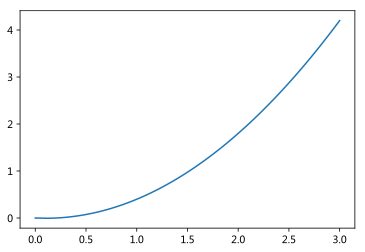

In [38]:
import matplotlib.pyplot as plt
plt.plot(x, -y)

In [45]:
s='''青年向大师哭诉：“大师，我高考失利，考不上大学，父母责骂我，女朋友也离我而去，请您收下我，让我皈依佛门吧！”只见大师拿出一叠高考资料，青年恍然大悟：“大师是叫我不要放弃高考，明年再战，是吗？”大师摇头说道：“施主，我们这里只招本科以上，你还是先回去考上本科再过来面试吧！”段子2最近买了电子烟，使用感觉还不错。昨天出门坐公交随手就塞到牛仔裤兜里了，可能是牛仔裤太紧，压到开关了，整个车厢的人都看我胯下部位一直在冒烟，我还专心看手机根本没发觉，直到一个好心的哥们拍拍我，哥们你好像屌炸了。段子3小时候，我妈不止一次跟我说，亲嘴会怀孕，亲嘴会怀孕，结果我家猫跳起来抢肉吃的时候好死不死亲到了我的嘴，过了几个月它还生下了三只小猫„„出于责任感，有我一口肉吃，我就不会让那三只小猫吃素！段子4都说女儿找了男朋友，父母会有自己辛辛苦苦种的白菜被猪拱了的伤感。可我弟弟自从找了女朋友，连家里都不回来住了，天天岳母娘给做好吃的，各种的乐不思蜀啊。老妈45°角仰望天空说：“白菜有没有拱着不知道，反正养了20多年的猪肯定是丢了。。。 ”段子5西天取经，六耳猕猴混来进来，真假美猴王只有唐僧能分辨出来。 唐僧说:“为师想吃桃子。” 两猴犹豫了一下，都变成了桃子。 突然唐僧大喊:“八戒，给我拿下那只猕猴桃！”段子6保安：干嘛的？ 我：我想去楼顶看看。 保安：别装了，就说你亏多少吧？ 我：5万。。。 保安：一楼大厅排队，撞柱子去吧！ 我：为什么？ 保安：亏10万才能上二楼，20万三楼，30万4楼，40万五楼，100万六楼以上，楼顶VIP都是大户，你瞎掺乎什么！? ?段子7小时候我一次在家写作业，突然停电了，耶耶耶耶耶！终于不用写作业了，可以看电视了。还特二的去开电视，在黑暗的角落里我爸淡淡的说了说声：丑就够倒霉了，还这么傻！段子8我去营业厅办卡，问营业员小姑娘“这4g有啥好的？”小姑娘答“大叔，2g可以看仓井空小说，3g可以看仓井空图片，4g可以看仓井空视频。”我说姑娘你尽说些大叔听不懂的，给我办张4g卡吧段子9我是个送快递的，有个事情我必须说说！那个住2号大院7楼的女孩纸，你一直在单子上注明：本人孕妇请上门送货。我已经给你送了整整一年的上门送货了，我就想问问你：你怀的是不是哪吒？！段子10交易厅遇到一女士，她说：中国股市有点像阳痿丈夫，抛弃他吧，有点舍不得；厮守吧，天天受气；好吃好喝侍候他，期望他能冒点阳气，刚看他勃起，衣服还没脱完，已不行了。关键是你刚穿了衣服准备去偷情，他又在后边拉着你说，有反应了，有反应了，你再等等！段子11一美女坐出租车刚上车，嘣的一声放了巨响的一个屁，美女甚是尴尬。这时司机抽了一口烟，缓缓的说：“屁是你所吃的食物不屈的亡魂的吶喊”美女一笑尴尬尽消，说：“师傅，你好文艺范啊”师傅摇头说：“可是这呐喊声也太大了，我特么以为爆胎了！！！”[哈哈]段子12小明妈在做面膜，这时门铃响了。妈妈对小明说：小明快去开门，妈妈贴着面膜见不得人。 小明听后于是去开门，原来是爸爸。爸爸问小明问：你妈呢？ 答：她正在做见不得人的事！段子13一人问：如果蹦极的时候绳索断了，你马上要掉进悬崖底下，只让你说三个字，你会说什么？ 有人回答：救命阿救救我、草泥马、要死了。。。之类的。 这时一大神默默回了一句：筋斗云。。。 秒杀全场！段子14一次出去买东西，迎面看见了几年不见的同学和一女的抱一小孩，我：操什么时候结婚的，小孩都这么大了，长的真像你小子，两人脸色有点尴尬，很慌张，同学就干笑了几声，留了电话号码，我说你们忙去吧，我也有点事，同学：好的，电话联系，我刚转身走了几步就听见那女的说：姐夫现在怎么办！段子15今早媳妇收到一快递，急着想拆开，一回屋就又是找刀片，又是找剪刀！“ 我就说到：自己买的东西至于那么激动吗？” 媳妇头也不抬的说道“你懂什么？我们女人拆快递，就像你们男人撕女人丝袜一样，明知道里面是啥，却还是欲罢不能！” 好吧，我瞬间领悟了。。。段子16在菜市场买菜，看见一个姑娘正在很认真地挑黄瓜。 卖菜大妈很热情地说：姑娘，吃还是用啊？ 姑娘红着脸说：用。 大妈说：哎哎，这根好，又粗又壮的。 姑娘涨红着脸说：我是拿来敷脸的！ 大妈无辜地说：我没别的意思啊，你脸这么大，细的切片也盖不过来啊！段子17同学聚会有一次一起玩真心话大冒险。朋友问女朋友。有没有车震过？ 女朋友回答有。 我心里想女朋友真给我面子，没有在同学面前暴露出我没有车。段子18第一次去女朋友家，吃饭期间二货女友不停的各种夸她妈妈做饭手艺怎么怎么样，我也都笑脸附和着各种菜怎么怎么好吃。 突然女友来一句：“知道我妈是怎么把我爸拴在家里的么？” 心不在焉的我张嘴就来了一句：“用狗链么？”段子19一哥们儿去考雅思，口试的时候看过题目之后习惯性的说了句，我日。 考官懂一点中文，就问什么意思。 他说这是我们中国人在遇到重大问题时，借助太阳的力量激励自己！'''

In [51]:
import re
for line in re.split(r'段子\d+', s):
    print "'%s'," % line


'青年向大师哭诉：“大师，我高考失利，考不上大学，父母责骂我，女朋友也离我而去，请您收下我，让我皈依佛门吧！”只见大师拿出一叠高考资料，青年恍然大悟：“大师是叫我不要放弃高考，明年再战，是吗？”大师摇头说道：“施主，我们这里只招本科以上，你还是先回去考上本科再过来面试吧！”',
'最近买了电子烟，使用感觉还不错。昨天出门坐公交随手就塞到牛仔裤兜里了，可能是牛仔裤太紧，压到开关了，整个车厢的人都看我胯下部位一直在冒烟，我还专心看手机根本没发觉，直到一个好心的哥们拍拍我，哥们你好像屌炸了。',
'小时候，我妈不止一次跟我说，亲嘴会怀孕，亲嘴会怀孕，结果我家猫跳起来抢肉吃的时候好死不死亲到了我的嘴，过了几个月它还生下了三只小猫„„出于责任感，有我一口肉吃，我就不会让那三只小猫吃素！',
'都说女儿找了男朋友，父母会有自己辛辛苦苦种的白菜被猪拱了的伤感。可我弟弟自从找了女朋友，连家里都不回来住了，天天岳母娘给做好吃的，各种的乐不思蜀啊。老妈45°角仰望天空说：“白菜有没有拱着不知道，反正养了20多年的猪肯定是丢了。。。 ”',
'西天取经，六耳猕猴混来进来，真假美猴王只有唐僧能分辨出来。 唐僧说:“为师想吃桃子。” 两猴犹豫了一下，都变成了桃子。 突然唐僧大喊:“八戒，给我拿下那只猕猴桃！”',
'保安：干嘛的？ 我：我想去楼顶看看。 保安：别装了，就说你亏多少吧？ 我：5万。。。 保安：一楼大厅排队，撞柱子去吧！ 我：为什么？ 保安：亏10万才能上二楼，20万三楼，30万4楼，40万五楼，100万六楼以上，楼顶VIP都是大户，你瞎掺乎什么！? ?',
'小时候我一次在家写作业，突然停电了，耶耶耶耶耶！终于不用写作业了，可以看电视了。还特二的去开电视，在黑暗的角落里我爸淡淡的说了说声：丑就够倒霉了，还这么傻！',
'我去营业厅办卡，问营业员小姑娘“这4g有啥好的？”小姑娘答“大叔，2g可以看仓井空小说，3g可以看仓井空图片，4g可以看仓井空视频。”我说姑娘你尽说些大叔听不懂的，给我办张4g卡吧',
'我是个送快递的，有个事情我必须说说！那个住2号大院7楼的女孩纸，你一直在单子上注明：本人孕妇请上门送货。我已经给你送了整整一年的上门送货了，我就想问问你：你怀的是不是哪吒？！',
'交易厅遇到一女士，她说：中国股市有点像阳痿丈夫，抛弃他吧，有点舍不得；厮守吧，天天受气；好吃好喝

In [52]:
s='''从前有个人钓鱼，钓到了只鱿鱼。鱿鱼求他：“你放了我吧！”那个人说：“好的，那么我来考问你几个问题。”鱿鱼很开心说：“你考吧！”然后人就把鱿鱼给烤了。

一只企鹅一直拔毛一直拔毛一直拔毛，你知道他最后说了句什么话嘛？答：好冷啊……

一个精神病人拿着钓竿在一个空着的鱼缸做钓鱼状，一个护士路过，想调笑他一下，于是问道：“今天你吊了几条鱼啊？”病人答道：“你脑袋有毛病啊，没看见鱼缸是空的啊！”

五元钱被犯罪团伙绑架了，打电话给百元钞：“喂！你儿子在这里，不想我们撕票就用自己来换他！”百元钞想了一下说：“撕吧，撕了你们连5块钱都没有了！”

我们军训的时候，晚上组织卡拉ok活动，不过基本上还是要求保持坐姿。班里的mm负责报幕：“下面由某某某给大家带来一首《水牛》！”mm回到幕后片刻又急跑出来：“对不起，某某某献给大家的是《水车》。”结果，音乐响起，是郑智化的《水手》。那个哥儿们郁闷得在台上光跑调……

一老太太拄着拐杖上了公共汽车，坐司机后面。当汽车过了几站，又靠站停下时，老太太用拐杖戳司机的臀部，着急地问：“这是什么地方？”司机生气地答道：“这是屁股！”'''

In [55]:
for line in s.split():
    print "'%s'," % line

'从前有个人钓鱼，钓到了只鱿鱼。鱿鱼求他：“你放了我吧！”那个人说：“好的，那么我来考问你几个问题。”鱿鱼很开心说：“你考吧！”然后人就把鱿鱼给烤了。',
'一只企鹅一直拔毛一直拔毛一直拔毛，你知道他最后说了句什么话嘛？答：好冷啊……',
'一个精神病人拿着钓竿在一个空着的鱼缸做钓鱼状，一个护士路过，想调笑他一下，于是问道：“今天你吊了几条鱼啊？”病人答道：“你脑袋有毛病啊，没看见鱼缸是空的啊！”',
'五元钱被犯罪团伙绑架了，打电话给百元钞：“喂！你儿子在这里，不想我们撕票就用自己来换他！”百元钞想了一下说：“撕吧，撕了你们连5块钱都没有了！”',
'我们军训的时候，晚上组织卡拉ok活动，不过基本上还是要求保持坐姿。班里的mm负责报幕：“下面由某某某给大家带来一首《水牛》！”mm回到幕后片刻又急跑出来：“对不起，某某某献给大家的是《水车》。”结果，音乐响起，是郑智化的《水手》。那个哥儿们郁闷得在台上光跑调……',
'一老太太拄着拐杖上了公共汽车，坐司机后面。当汽车过了几站，又靠站停下时，老太太用拐杖戳司机的臀部，着急地问：“这是什么地方？”司机生气地答道：“这是屁股！”',


In [72]:
s='''1、 爸爸：你的英语试卷怎么得了零分？20多道选择题也得蒙对几个啊！儿子：我都选了D项。爸爸：那也得有对的呀！儿子：发下试卷我仔细看了看，选择题只有A、B、C三个选项！

2、 妈妈问正玩游戏的儿子：儿子，上周给了你那么多零花钱，你怎么都花光了？儿子：妈妈，没看见我正忙着吗？等我有空再问好不好？妈妈：你不是玩游戏就是看电视，什么时候有空？儿子：睡觉的时候！

3、 上一年级的儿子边写作业边哼儿歌，妈妈说：儿子，做作业怎么还唱歌呢？一心可不能二用哟！儿子不出声了。过了一会，妈妈边擦桌子边问：儿子，昨天给你的10元零花钱，怎么都花光啦？儿子不吭声。妈妈又问一边，儿子说：做家务怎么还说话呢？一心可不能二用哟!

4、 粉红女郎炫耀：“据目测，我是我们公司胸最大的！”姐妹白骨精问：“你同事全都是男的吧？”

5、 你站在路边吃西瓜，驴子站在你旁边吃草，我热情地向你打招呼：嗨！你头也不抬，自顾自吃吃吃，我狠狠抽了你驴一鞭子，骂道：你多大的官，(www.siandian.com 闪点情话网)咋就不理人呢？

6、 警察跟妻子吵架，可是妻子不理他，也不吱声，警察：你有权保持沉默，因为你所做的任何陈述将可能成为对你不利的证据......

7、 刘二问张三：你为什么每天都要喝啤酒？ 张三说：因为我每天的心情，不是太好，就是太坏。刘二：青蛙跳井--不懂？ 张三解释说：心情太好了，来一桶啤酒庆贺；心情太坏了，来一扎啤酒解闷！

8、 一老人到书店买书。“同志， 有艾青诗吗？”“老不正经，多大了，还看艾青诗？”

9、 女人开玩笑，试探着问：如果我在外面有了别的男人你会怎么样？男：我无所谓，因为我也已经有了别的女人！

10、 男：如果，我在外面有个女人你会怎么样？女：我不吱声，睁一只眼闭一只眼。男惊喜，正要表态，那女的接着说，然后瞄准你，开枪！

11、 中国版唐。吉可德：“警察先生，因为实名举报腐败分子，我这是第三次挨打了！我是豁出去了，但就怕连累我的家人呀！请求保护！” 警察：“抱歉，没办法。你不该不戴面具‘捅马蜂窝’！”

12、 "旺旺突然说：亲，我怀孕了。哥一惊,那人又说：明天去检查。心想你丫是谁，想讹我不成？正琢磨着，那人又说：“只能后天给你发货了”。哥坐地晕死！"

13、 筷子对面条说：亲爱的，每次当我抱你的时候，我总感觉到一种绵绵的诱人感觉和气息。面条长叹一声说：其实，我也愿意让你分享这种感觉，在碗里我被泡，在嘴里我被咬，做面条很难啊。

14、 一对小情侣受了欺负，女的非要去报仇，男的劝说：君子报仇，十年不晚，小不忍则乱大谋。女的说：美女报仇，越快越爽，别因小失大。

15、 男对女：我这人很仗义的，为朋友不惜两肋插刀，为自己的女人不惜插朋友两刀。女对男：我这人很直爽的，对朋友也是两肋插刀，对自己不喜欢的男人，我是背后插一刀。

16、 儿子：“爸爸，我是什么啊？”爸爸：“傻儿子，你是我们的乖宝贝啊。”儿子：“那爸爸是什么啊？”爸爸沉思了一会说：“是人。”儿子追问道：“那人是什么啊？”爸爸笑着说：“儿子你蛮好学的吗，人是哺乳动物中的一种。”儿子：“哦，那爸爸不是应该在动物园里的吗？”

17、 问：有个漂亮MM交了6个男朋友，请问她情人节该怎么过？ 答：一起吃火锅吧！

18、 诶呀，我滴天呀，天气怎么真么人呢，我滴天呀，天气真么热你怎么还有心思跟这写作捏，快回去写作业去！

19、 问：你独自流落荒岛，手机没信号，突然能打了，你第一个电话打给谁？ 答：中国移动，投诉他们！怎么信号这么差！

20、 爸爸：“今年 ‘韬奋奖’ 的得主是XXX，真是实至名归啊！”儿子：“‘掏粪奖’？这个名字多难听啊！叫‘环卫工人奖’不好吗？”爸爸无语。

21、 女对男：看你贼眉鼠眼，还有一张歪地瓜脸，让人怎么对你产生幻想，男对女：我眼睛小的不过几个G，我自知存不下您那几十个G的大脸。

22、 【哇，上周一进行了物理考试，周三进行了数学考试，周五又进行了语文考试，太紧张了！】【看你这么兴奋，是不是考的很不错啊。】【不是，我是庆幸考试的不是我们班。】

23、 【你爱我吗？】【爱！】【如果世界末日来了，你就剩下一分钟，你会和我在一起吗？】【不会，选择和我不喜欢的人一起】【为什么？】【因为和不喜欢的人在一起会觉得一分钟很长。】

24、 人潮拥挤的街头，一男子目不转睛地盯着美女看。美女走过来说：快把你的老鼠眼闭上，高雅点说你的眼光是赞赏，低俗点说你他妈就是个色狼。男说：见过美女，没见过你这么流氓的美女，高雅点说你是个女人，低俗点说你他妈就不是个人。

25、 【老师，学习是为了考试吗？】【不是。】【那你为什么老是考试？】【考试是为了让你更好的学习。】

26、 法律课上教授举例：“一人到我家偷东西，被我发现，于是他将我杀死。后来警察将他抓住，称他为嫌疑人，那么称我什么人？”学生异口同声：“死人！”

27、 网上A男问B女：聊聊？B女：聊聊！A男：多大？B女：18。A男：家是？B女：东北。A男：工作？B女：饭店。A男：名字？B女：倪嫲。

28、 胖女朋友：“今天你吃什么的啊。”瘦男朋友：“没吃什么和平时一样。”胖女朋友：“我今天肚子感觉好饿又想吃东西了。”瘦男朋友：“你还吃啊，你那肚子都和4个月的孕妇一样大了。”胖女朋友：“我说那原来我是一个人吃这么就够了，现在是双人份所以不够啊。”

29、 老师：“请举出‘与人分担痛苦可使痛苦减半’的事例。”学生：“我房间里有十只蚊咬我，我把你儿子叫来与我同住…”

30、 大街上，一个小女孩走到一位穿警服的叔叔面前，她上下打量一番，小心地问道： 　　“您是警察吗？” 　　“是的。” 　　“妈妈说，不论遇到什么困难，求到警察，都会得到帮助，是吗？” 　　“对！” 　　“那好，”小女孩把一只脚抬了起来，“请帮我系鞋带。”'''

In [73]:
for line in re.split(r'\d+、|\s+', s):
    if line.strip() == '':
        continue
    print "'%s'," % line

'爸爸：你的英语试卷怎么得了零分？20多道选择题也得蒙对几个啊！儿子：我都选了D项。爸爸：那也得有对的呀！儿子：发下试卷我仔细看了看，选择题只有A、B、C三个选项！',
'妈妈问正玩游戏的儿子：儿子，上周给了你那么多零花钱，你怎么都花光了？儿子：妈妈，没看见我正忙着吗？等我有空再问好不好？妈妈：你不是玩游戏就是看电视，什么时候有空？儿子：睡觉的时候！',
'上一年级的儿子边写作业边哼儿歌，妈妈说：儿子，做作业怎么还唱歌呢？一心可不能二用哟！儿子不出声了。过了一会，妈妈边擦桌子边问：儿子，昨天给你的10元零花钱，怎么都花光啦？儿子不吭声。妈妈又问一边，儿子说：做家务怎么还说话呢？一心可不能二用哟!',
'粉红女郎炫耀：“据目测，我是我们公司胸最大的！”姐妹白骨精问：“你同事全都是男的吧？”',
'你站在路边吃西瓜，驴子站在你旁边吃草，我热情地向你打招呼：嗨！你头也不抬，自顾自吃吃吃，我狠狠抽了你驴一鞭子，骂道：你多大的官，(www.siandian.com',
'闪点情话网)咋就不理人呢？',
'警察跟妻子吵架，可是妻子不理他，也不吱声，警察：你有权保持沉默，因为你所做的任何陈述将可能成为对你不利的证据......',
'刘二问张三：你为什么每天都要喝啤酒？',
'张三说：因为我每天的心情，不是太好，就是太坏。刘二：青蛙跳井--不懂？',
'张三解释说：心情太好了，来一桶啤酒庆贺；心情太坏了，来一扎啤酒解闷！',
'一老人到书店买书。“同志，',
'有艾青诗吗？”“老不正经，多大了，还看艾青诗？”',
'女人开玩笑，试探着问：如果我在外面有了别的男人你会怎么样？男：我无所谓，因为我也已经有了别的女人！',
'男：如果，我在外面有个女人你会怎么样？女：我不吱声，睁一只眼闭一只眼。男惊喜，正要表态，那女的接着说，然后瞄准你，开枪！',
'中国版唐。吉可德：“警察先生，因为实名举报腐败分子，我这是第三次挨打了！我是豁出去了，但就怕连累我的家人呀！请求保护！”',
'警察：“抱歉，没办法。你不该不戴面具‘捅马蜂窝’！”',
'"旺旺突然说：亲，我怀孕了。哥一惊,那人又说：明天去检查。心想你丫是谁，想讹我不成？正琢磨着，那人又说：“只能后天给你发货了”。哥坐地晕死！"',
'筷子对面条说：亲爱的，每次当我抱你的时候，我总感觉到一种绵绵的诱人感觉和气息。面条长叹一声说：其实，我也